# Polynomial features

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [12]:
from sklearn import set_config
set_config(transform_output = 'pandas')

In [13]:
# toy dataframe with values 1 to 10
df = pd.DataFrame(np.linspace(0, 10, 11), columns=["var"])

df

,var
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0
9,9.0


In [14]:
# let's create features up to a 3rd degree polynomial
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
dft = poly.fit_transform(df)

dft

,var,var^2,var^3
0,0.0,0.0,0.0
1,1.0,1.0,1.0
2,2.0,4.0,8.0
3,3.0,9.0,27.0
4,4.0,16.0,64.0
5,5.0,25.0,125.0
6,6.0,36.0,216.0
7,7.0,49.0,343.0
8,8.0,64.0,512.0
9,9.0,81.0,729.0


In [15]:
# the names of the returned features
poly.get_feature_names_out()

array(['var', 'var^2', 'var^3'], dtype=object)

In [16]:
# plt.rcParams["figure.dpi"] = 450

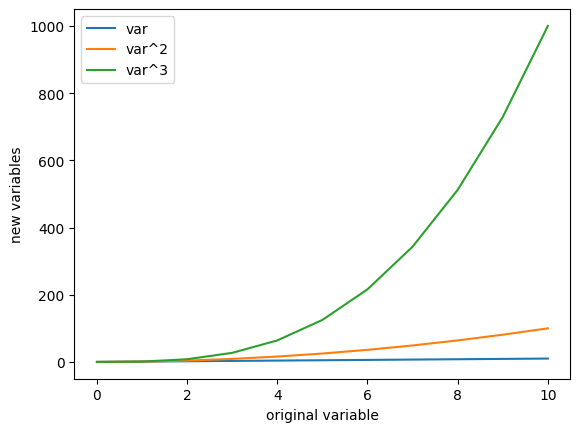

In [17]:
# plot poly features against original variable
plt.plot(df["var"], dft)
plt.legend(dft.columns)
plt.xlabel("original variable")
plt.ylabel("new variables")
plt.show()

In [18]:
# let's add another column
df["col"] = np.linspace(0, 5, 11)
df["feat"] = np.linspace(0, 5, 11)

df

,var,col,feat
0,0.0,0.0,0.0
1,1.0,0.5,0.5
2,2.0,1.0,1.0
3,3.0,1.5,1.5
4,4.0,2.0,2.0
5,5.0,2.5,2.5
6,6.0,3.0,3.0
7,7.0,3.5,3.5
8,8.0,4.0,4.0
9,9.0,4.5,4.5


In [19]:
# let's create features up to a 3rd degree polynomial
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

dft = poly.fit_transform(df)

dft

,var,col,feat,var col,var feat,col feat
0,0.0,0.0,0.0,0.0,0.0,0.00
1,1.0,0.5,0.5,0.5,0.5,0.25
2,2.0,1.0,1.0,2.0,2.0,1.00
3,3.0,1.5,1.5,4.5,4.5,2.25
4,4.0,2.0,2.0,8.0,8.0,4.00
5,5.0,2.5,2.5,12.5,12.5,6.25
6,6.0,3.0,3.0,18.0,18.0,9.00
7,7.0,3.5,3.5,24.5,24.5,12.25
8,8.0,4.0,4.0,32.0,32.0,16.00
9,9.0,4.5,4.5,40.5,40.5,20.25


In [20]:
# let's create features up to a 3rd degree polynomial
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
dft = poly.fit_transform(df)

dft

,var,col,feat,var col,var feat,col feat,var col feat
0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
1,1.0,0.5,0.5,0.5,0.5,0.25,0.25
2,2.0,1.0,1.0,2.0,2.0,1.00,2.00
3,3.0,1.5,1.5,4.5,4.5,2.25,6.75
4,4.0,2.0,2.0,8.0,8.0,4.00,16.00
5,5.0,2.5,2.5,12.5,12.5,6.25,31.25
6,6.0,3.0,3.0,18.0,18.0,9.00,54.00
7,7.0,3.5,3.5,24.5,24.5,12.25,85.75
8,8.0,4.0,4.0,32.0,32.0,16.00,128.00
9,9.0,4.5,4.5,40.5,40.5,20.25,182.25


In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [22]:
# load the breast cancer dataset from sklearn
data = load_breast_cancer()

# create a dataframe with the independent variables
df = pd.DataFrame(data.data, columns=data.feature_names)

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    df, data.target, test_size=0.3, random_state=0
)

X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [23]:
# features to combine
features = ["mean smoothness", "mean compactness", "mean concavity"]

In [24]:
# set up the polynomial expansion transformer
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [25]:
ct = ColumnTransformer(
    [("poly", poly, features)],
    remainder='passthrough')

In [26]:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('poly',
                                 PolynomialFeatures(degree=3,
                                                    include_bias=False),
                                 ['mean smoothness', 'mean compactness',
                                  'mean concavity'])])

In [27]:
# create the new features
train_t = ct.transform(X_train)
test_t = ct.transform(X_test)

In [28]:
train_t

,poly__mean smoothness,poly__mean compactness,poly__mean concavity,poly__mean smoothness^2,poly__mean smoothness mean compactness,poly__mean smoothness mean concavity,poly__mean compactness^2,poly__mean compactness mean concavity,poly__mean concavity^2,poly__mean smoothness^3,...,remainder__worst radius,remainder__worst texture,remainder__worst perimeter,remainder__worst area,remainder__worst smoothness,remainder__worst compactness,remainder__worst concavity,remainder__worst concave points,remainder__worst symmetry,remainder__worst fractal dimension
478,0.10460,0.08228,0.05308,0.010941,0.008606,0.005552,0.006770,0.004367,0.002817,0.001144,...,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
303,0.10680,0.06678,0.02297,0.011406,0.007132,0.002453,0.004460,0.001534,0.000528,0.001218,...,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
155,0.08654,0.06679,0.03885,0.007489,0.005780,0.003362,0.004461,0.002595,0.001509,0.000648,...,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
186,0.08588,0.08468,0.08169,0.007375,0.007272,0.007016,0.007171,0.006918,0.006673,0.000633,...,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
101,0.11700,0.07568,0.00000,0.013689,0.008855,0.000000,0.005727,0.000000,0.000000,0.001602,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.08923,0.05884,0.08020,0.007962,0.005250,0.007156,0.003462,0.004719,0.006432,0.000710,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,0.11860,0.23960,0.22730,0.014066,0.028417,0.026958,0.057408,0.054461,0.051665,0.001668,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,0.10090,0.05956,0.02710,0.010181,0.006010,0.002734,0.003547,0.001614,0.000734,0.001027,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,0.06950,0.02344,0.00000,0.004830,0.001629,0.000000,0.000549,0.000000,0.000000,0.000336,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
